<a href="https://colab.research.google.com/github/georgezoto/Coding-in-TensorFlow/blob/master/Cassava-Disease-Classification/Cassava_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cassava Disease Classification: Helping farmers identify diseased plants
**Meetup event, come and join us 😀**  
https://www.meetup.com/Deep-Learning-Adventures/events/272014852/

**Kaggle Dataset 🎉**  
https://www.kaggle.com/c/cassava-disease/data

**Acknowledgements**  
We thank the different experts and collaborators from NaCRRI for assisting in preparing this dataset

**Citation**  
Please cite this paper if you use the dataset for your project: https://arxiv.org/pdf/1908.02900.pdf


![alt text](https://secure.meetupstatic.com/photos/event/d/a/6/d/highres_491455917.jpeg)

### Mount Google Drive for images and datasets ##

Using Colab, we need to mount our Google Drive in our virtual machine using an authorization code to access our images and train and test datasets.

- https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Google drive location where your ```kaggle.json``` API key is located

In [2]:
kaggle_google_drive_path = '/content/gdrive/My Drive/Colab Notebooks/Kaggle'

### This enviromental variable is used by ```kaggle competitions download``` command later


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = kaggle_google_drive_path

### Change the working directory where the kaggle api file is

In [4]:
%cd "$kaggle_google_drive_path/Cassava-Disease-Classification"
%ls

/content/gdrive/My Drive/Colab Notebooks/Kaggle/Cassava-Disease-Classification
 Cassava-Disease-Classification-EfficientNetB7-v5.h5  'train-healthy-1 (4).jpg'
 Cassava-Disease-Classification-MobileNetV2-v4.6.h5   'train-healthy-1 (5).jpg'
 Cassava-Disease-Classification-MobileNetV2-v4.h5     'train-healthy-1 (6).jpg'
 Cassava-Disease-Classification-v1.h5                  train-healthy-1.jpg
 Cassava-Disease-Classification-v1.history.pickle     'train-healthy-2 (1).jpg'
 Cassava-Disease-Classification-v2.h5                 'train-healthy-2 (2).jpg'
 Cassava-Disease-Classification-v2.history.pickle     'train-healthy-2 (3).jpg'
 Cassava-Disease-Classification-v3.h5                 'train-healthy-2 (4).jpg'
 Cassava-Disease-Classification-v3.history.pickle     'train-healthy-2 (5).jpg'
 Cassava-Disease-Classification-v4.h5                 'train-healthy-2 (6).jpg'
 Cassava-Disease-Classification-v4.history.pickle      train-healthy-2.jpg
 Cassava-Disease-Classification-v5.h5              

### Download our kaggle dataset to google drive

In [ ]:
#!kaggle competitions download -c cassava-disease

  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 41.3MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 11.7MB/s]
100% 774M/777M [00:09<00:00, 97.9MB/s]
100% 777M/777M [00:09<00:00, 85.9MB/s]
 98% 504M/515M [00:05<00:00, 99.3MB/s]
100% 515M/515M [00:05<00:00, 101MB/s] 
 99% 1.03G/1.04G [00:19<00:00, 78.4MB/s]
100% 1.04G/1.04G [00:19<00:00, 57.2MB/s]


In [5]:
%ls -ltr

total 4115303
-rw------- 1 root root     660788 Jul 24 01:31  random.txt
-rw------- 1 root root  814615952 Jul 24 01:31  train.zip
-rw------- 1 root root      85797 Jul 24 01:31  sample_submission_file.csv
-rw------- 1 root root  539790463 Jul 24 01:31  test.zip
-rw------- 1 root root 1119165181 Jul 24 01:31  extraimages.zip
-rw------- 1 root root      57574 Jul 24 01:52  train-healthy-0.jpg
-rw------- 1 root root      73509 Jul 24 01:52  train-healthy-1.jpg
-rw------- 1 root root      58352 Jul 24 01:52  train-healthy-2.jpg
-rw------- 1 root root      65123 Jul 24 01:52  train-healthy-3.jpg
-rw------- 1 root root      82723 Jul 24 01:52  train-healthy-4.jpg
-rw------- 1 root root      57574 Jul 24 02:18 'train-healthy-0 (1).jpg'
-rw------- 1 root root      73509 Jul 24 02:18 'train-healthy-1 (1).jpg'
-rw------- 1 root root      58352 Jul 24 02:18 'train-healthy-2 (1).jpg'
-rw------- 1 root root      65123 Jul 24 02:18 'train-healthy-3 (1).jpg'
-rw------- 1 root root      82723 Jul 24 

In [6]:
%pwd

'/content/gdrive/My Drive/Colab Notebooks/Kaggle/Cassava-Disease-Classification'

In [7]:
import os
import zipfile

local_zip = kaggle_google_drive_path+'/Cassava-Disease-Classification/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = kaggle_google_drive_path+'/Cassava-Disease-Classification/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

### Directories of each class in the training dataset

In [7]:
cbb = os.path.join('/tmp/train/cbb')
cbsd = os.path.join('/tmp/train/cbsd')
cgm = os.path.join('/tmp/train/cgm')
cmd = os.path.join('/tmp/train/cmd')
healthy = os.path.join('/tmp/train/healthy')

print('total training cbb images:', len(os.listdir(cbb)))
print('total training cbsd images:', len(os.listdir(cbsd)))
print('total training cgm images:', len(os.listdir(cgm)))
print('total training cmd images:', len(os.listdir(cmd)))
print('total training healthy images:', len(os.listdir(healthy)))

cbb_files = os.listdir(cbb)
print(cbb_files[:10])

cbsd_files = os.listdir(cbsd)
print(cbsd_files[:10])

cgm_files = os.listdir(cgm)
print(cgm_files[:10])

cmd_files = os.listdir(cmd)
print(cmd_files[:10])

healthy_files = os.listdir(healthy)
print(healthy_files[:10])

total training cbb images: 466
total training cbsd images: 1443
total training cgm images: 773
total training cmd images: 2658
total training healthy images: 316
['train-cbb-349.jpg', 'train-cbb-211.jpg', 'train-cbb-252.jpg', 'train-cbb-367.jpg', 'train-cbb-319.jpg', 'train-cbb-39.jpg', 'train-cbb-137.jpg', 'train-cbb-93.jpg', 'train-cbb-180.jpg', 'train-cbb-287.jpg']
['train-cbsd-1339.jpg', 'train-cbsd-865.jpg', 'train-cbsd-907.jpg', 'train-cbsd-300.jpg', 'train-cbsd-595.jpg', 'train-cbsd-493.jpg', 'train-cbsd-1208.jpg', 'train-cbsd-899.jpg', 'train-cbsd-1177.jpg', 'train-cbsd-311.jpg']
['train-cgm-46.jpg', 'train-cgm-97.jpg', 'train-cgm-14.jpg', 'train-cgm-349.jpg', 'train-cgm-181.jpg', 'train-cgm-33.jpg', 'train-cgm-513.jpg', 'train-cgm-552.jpg', 'train-cgm-129.jpg', 'train-cgm-559.jpg']
['train-cmd-469.jpg', 'train-cmd-2036.jpg', 'train-cmd-2182.jpg', 'train-cmd-2565.jpg', 'train-cmd-2100.jpg', 'train-cmd-1674.jpg', 'train-cmd-2187.jpg', 'train-cmd-1621.jpg', 'train-cmd-1773.jpg', 

### Plot 2 images from each class

/tmp/train/cbb/train-cbb-349.jpg


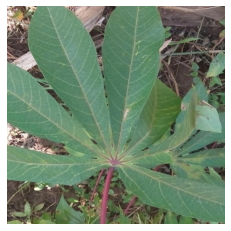

/tmp/train/cbb/train-cbb-211.jpg


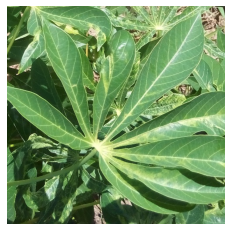

/tmp/train/cbsd/train-cbsd-1339.jpg


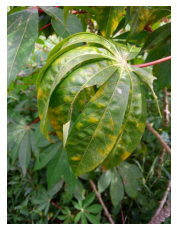

/tmp/train/cbsd/train-cbsd-865.jpg


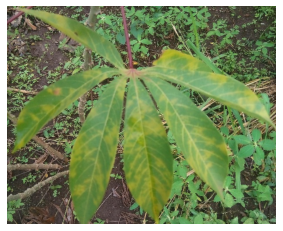

/tmp/train/cgm/train-cgm-46.jpg


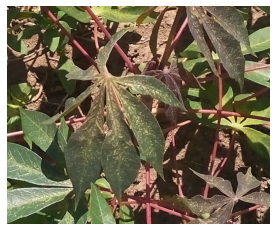

/tmp/train/cgm/train-cgm-97.jpg


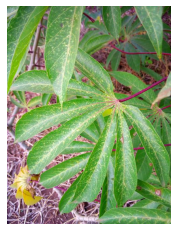

/tmp/train/cmd/train-cmd-469.jpg


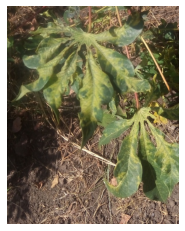

/tmp/train/cmd/train-cmd-2036.jpg


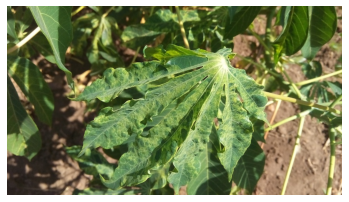

/tmp/train/healthy/train-healthy-20.jpg


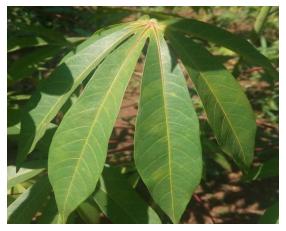

/tmp/train/healthy/train-healthy-157.jpg


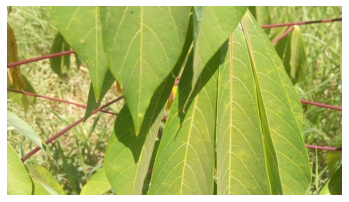

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_cbb = [os.path.join(cbb, fname) 
                for fname in cbb_files[pic_index-2:pic_index]]
next_cbsd = [os.path.join(cbsd, fname) 
                for fname in cbsd_files[pic_index-2:pic_index]]
next_cgm = [os.path.join(cgm, fname) 
                for fname in cgm_files[pic_index-2:pic_index]]
next_cmd = [os.path.join(cmd, fname) 
                for fname in cmd_files[pic_index-2:pic_index]]                
next_healthy = [os.path.join(healthy, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_cbb+next_cbsd+next_cgm+next_cmd+next_healthy):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Imbalanced dataset

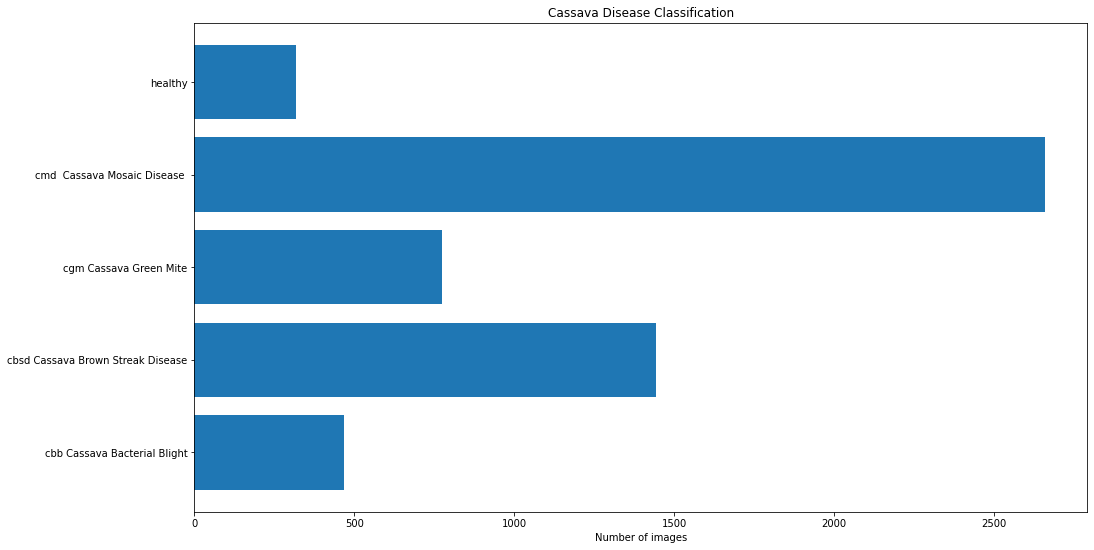

In [13]:
classes = [len(os.listdir(cbb)), len(os.listdir(cbsd)), len(os.listdir(cgm)), len(os.listdir(cmd)), len(os.listdir(healthy))]
labels = ('cbb Cassava Bacterial Blight', 'cbsd Cassava Brown Streak Disease', 'cgm Cassava Green Mite', 'cmd  Cassava Mosaic Disease ', 'healthy')
y_pos = range(len(classes))

fig = plt.figure(figsize=(16,9))
plt.barh(y_pos, classes, align='center', alpha=1)
plt.yticks(y_pos, labels)
plt.xlabel('Number of images')
plt.title('Cassava Disease Classification')

plt.show()

### Import tf, keras_preprocessing, ImageDataGenerator

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Cassava-Disease-Classification-v1 0.3M parameters 73% training, 72% validation accuracy

### Our validation/test data have no labels. With validation_split=0.2 we split out 20% of the training data as a seperate validation set

### Hyperparameters

In [9]:
my_batch_size = 32
my_classes = 5
my_epochs = 50

In [16]:
TRAINING_DIR = "/tmp/train/"
imageDataGenerator = ImageDataGenerator(
                      rescale = 1./255,
                      rotation_range=40,
                      #width_shift_range=0.2,
                      #height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      #fill_mode='nearest', #One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'.
                      validation_split=0.2)

train_generator = imageDataGenerator.flow_from_directory(
	"/tmp/train/",
  subset='training',
	target_size=(150,150),
	class_mode='categorical', #"sparse" will be 1D integer labels #"categorical" will be 2D one-hot encoded labels,
  batch_size=my_batch_size,
  shuffle=True
)

validation_generator = imageDataGenerator.flow_from_directory(
	"/tmp/train/",
  subset='validation',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=my_batch_size,
  shuffle=False
)

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


### Helpful utility plot function from https://www.tensorflow.org/tutorials/images/classification

In [10]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

### Visualize training images

In [18]:
sample_training_images, _ = next(train_generator)

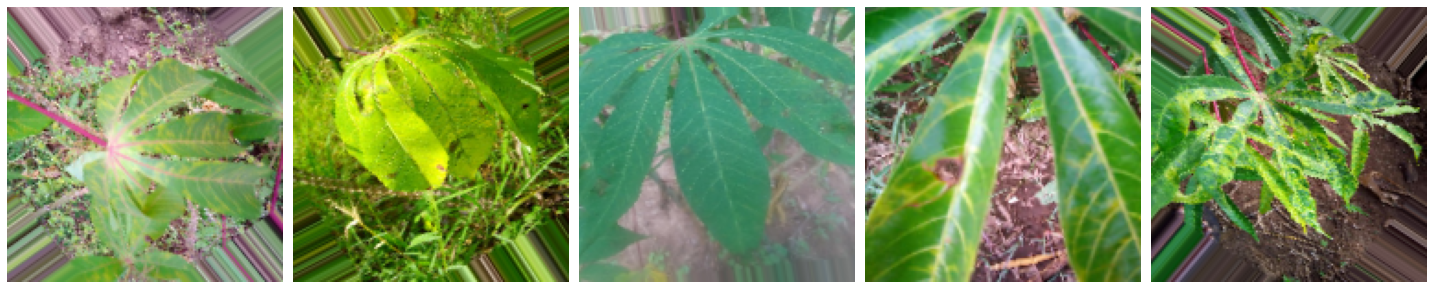

In [19]:
plotImages(sample_training_images[:5])

### Visualize validation images

In [20]:
sample_validatiom_images, _ = next(validation_generator)

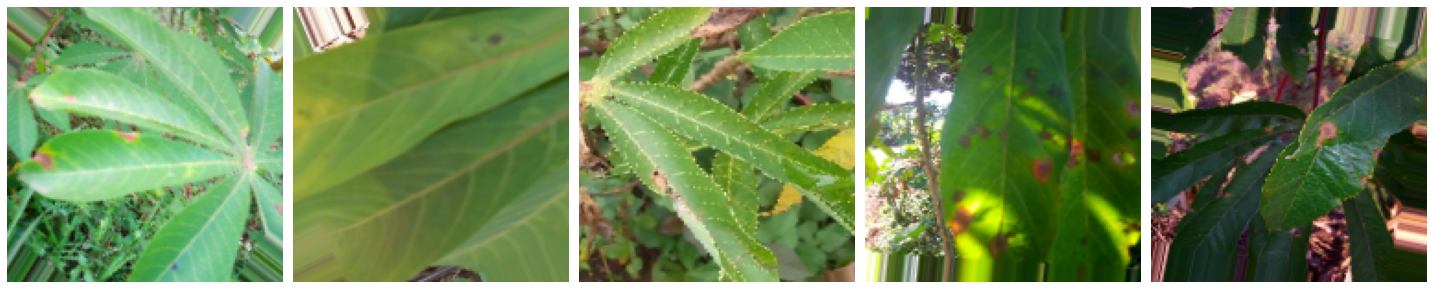

In [21]:
plotImages(sample_validatiom_images[:5])

### Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [67]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Gloobal average pooling to convert the 4D tensor (batch, width, height, channel) to 2D (batch, channel)
    tf.keras.layers.GlobalAveragePooling2D(),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(my_classes, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [68]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

### Let's define our loss function, optimizer and metrics to track

In [69]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Use callback: ModelCheckpoint 
### https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
### Use callback : EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
### https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [76]:
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
# #estore model weights from the epoch with the best value of the monitored quantity
#my_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

### Use ModelCheckpoint callback to monitor and save the "best" model and it's weights and biases

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [77]:
checkpoint_filepath = 'Cassava-Disease-Classification-v1.h5'
my_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, 
                                        save_weights_only=True, monitor='val_loss', 
                                        mode='auto', save_best_only=True)

### Model training using GPU

In [78]:
history = model.fit(train_generator, epochs=my_epochs, validation_data = validation_generator, verbose = 1, callbacks=[my_callback])

Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 1.0994 - accuracy: 0.6064
Epoch 00001: val_loss improved from inf to 1.06817, saving model to Cassava-Disease-Classification-v1.h5
142/142 [==============================] - 67s 472ms/step - loss: 1.0994 - accuracy: 0.6064 - val_loss: 1.0682 - val_accuracy: 0.6191
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 1.0647 - accuracy: 0.6161
Epoch 00002: val_loss did not improve from 1.06817
142/142 [==============================] - 65s 458ms/step - loss: 1.0647 - accuracy: 0.6161 - val_loss: 1.0723 - val_accuracy: 0.5961
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 1.0552 - accuracy: 0.6203
Epoch 00003: val_loss improved from 1.06817 to 1.03855, saving model to Cassava-Disease-Classification-v1.h5
142/142 [==============================] - 65s 461ms/step - loss: 1.0552 - accuracy: 0.6203 - val_loss: 1.0385 - val_accuracy: 0.6218
Epoch 4/50
142/142 [=========================

### Store to disk the history object for plots at anytime without retraining this model
https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict  
https://stackoverflow.com/questions/23582489/python-pickle-protocol-choice

In [12]:
import pickle

In [81]:
#Write history to disk
with open('Cassava-Disease-Classification-v1.history.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Read history from disk
#with open('Cassava-Disease-Classification-v1.history.pickle', 'rb') as handle:
#    history = pickle.load(handle)

### Plot training and validation accuracy and loss

In [13]:
def plot_training_validation_accuracy_loss(version, history_file_path):
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

  #Number of time series
  num_time_series = len(version)

  for i in range(num_time_series):
    with open(history_file_path[i], 'rb') as handle:
      history = pickle.load(handle)
    
    if i == 0:
      style = '-' #, linewidth=2, markersize=12
    elif i == 1:
      style = '--'
    elif i == 2:
      style = 'o-'
    elif i == 3:
      style = '+-'

    ax1.plot(history['accuracy'], style, label=version[i] + ' Training accuracy')
    ax1.plot(history['val_accuracy'], style, label=version[i] + ' Validation accuracy')
    ax2.plot(history['loss'], style, label=version[i] + ' Training loss')
    ax2.plot(history['val_loss'], style, label=version[i] + ' Validation loss')
    
  ax1.legend(loc='best')
  ax1.set_title('Training and validation accuracy')
  
  ax2.legend(loc='best')
  ax2.set_title('Training and Validation loss')
  
  plt.xlabel('Epochs')
  plt.show()

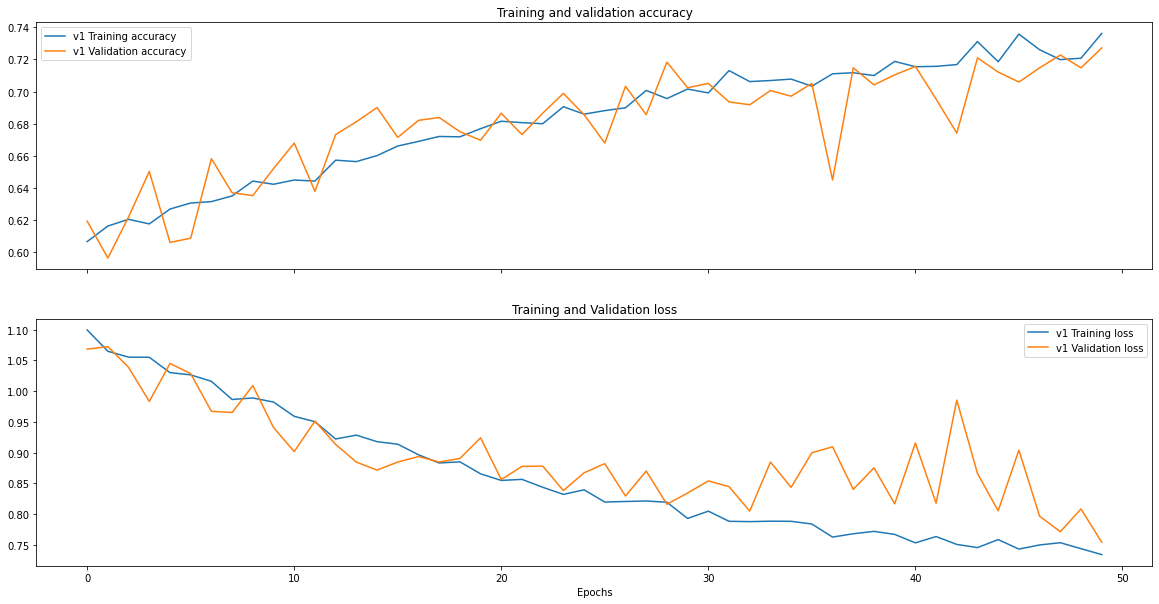

In [137]:
version = ['v1']
history_file_path = ['Cassava-Disease-Classification-v1.history.pickle']
plot_training_validation_accuracy_loss(version, history_file_path)

### Upload and classify your own image

In [107]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving train-healthy-0.jpg to train-healthy-0 (3).jpg
Saving train-healthy-1.jpg to train-healthy-1 (3).jpg
Saving train-healthy-2.jpg to train-healthy-2 (3).jpg
Saving train-healthy-3.jpg to train-healthy-3 (3).jpg
Saving train-healthy-4.jpg to train-healthy-4 (3).jpg
train-healthy-0.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-1.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-2.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-3.jpg
[[0.000000e+00 0.000000e+00 1.000000e+00 2.382627e-12 0.000000e+00]]
train-healthy-4.jpg
[[0.000000e+00 1.000000e+00 0.000000e+00 6.197027e-38 0.000000e+00]]


In [109]:
model.predict_classes(images, batch_size=10)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])

## Cassava-Disease-Classification-v2 2xv1 1.3M parameters 68% training, 70% validation accuracy

### New: 2xv1. Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [112]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Gloobal average pooling to convert the 4D tensor (batch, width, height, channel) to 2D (batch, channel)
    tf.keras.layers.GlobalAveragePooling2D(),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), #not needed since GlobalAveragePooling2D will resturn a 1D vector per image above, ignoring batch.
    tf.keras.layers.Dropout(0.2), #Look also at model.summary and the tensor shapes
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(my_classes, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [115]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 256)      

### Let's define our loss function, optimizer and metrics to track

In [116]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Use ModelCheckpoint callback to monitor and save the "best" model and it's weights and biases

In [117]:
checkpoint_filepath = 'Cassava-Disease-Classification-v2.h5'
my_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, 
                                        save_weights_only=True, monitor='val_loss', 
                                        mode='auto', save_best_only=True)

### Model training using GPU

In [118]:
history = model.fit(train_generator, epochs=my_epochs, validation_data = validation_generator, verbose = 1, callbacks=[my_callback])

Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 1.4123 - accuracy: 0.4612
Epoch 00001: val_loss improved from inf to 1.27529, saving model to Cassava-Disease-Classification-v2.h5
142/142 [==============================] - 71s 498ms/step - loss: 1.4123 - accuracy: 0.4612 - val_loss: 1.2753 - val_accuracy: 0.4739
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 1.3052 - accuracy: 0.4975
Epoch 00002: val_loss did not improve from 1.27529
142/142 [==============================] - 68s 482ms/step - loss: 1.3052 - accuracy: 0.4975 - val_loss: 1.4098 - val_accuracy: 0.4818
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 1.2412 - accuracy: 0.5337
Epoch 00003: val_loss improved from 1.27529 to 1.15660, saving model to Cassava-Disease-Classification-v2.h5
142/142 [==============================] - 67s 475ms/step - loss: 1.2412 - accuracy: 0.5337 - val_loss: 1.1566 - val_accuracy: 0.5784
Epoch 4/50
142/142 [=========================

### Store to disk the history object for plots at anytime without retraining this model

In [119]:
#Write history to disk
with open('Cassava-Disease-Classification-v2.history.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Plot training and validation accuracy and loss

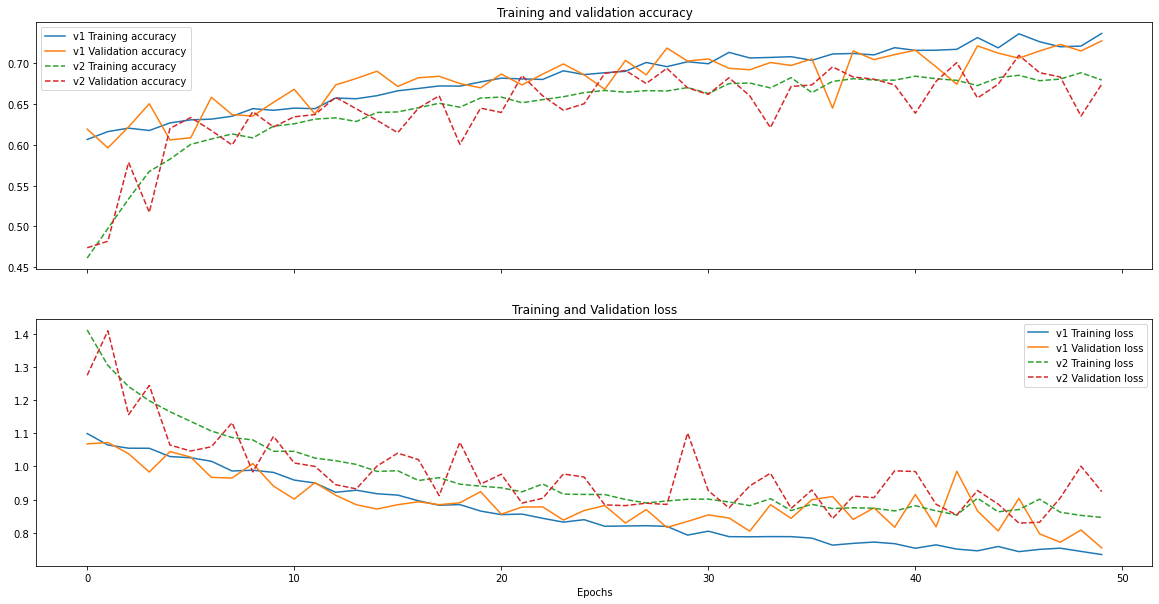

In [138]:
version = ['v1', 'v2']
history_file_path = ['Cassava-Disease-Classification-v1.history.pickle', 'Cassava-Disease-Classification-v2.history.pickle']
plot_training_validation_accuracy_loss(version, history_file_path)

### Upload and classify your own image

In [125]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (4).jpg
Saving train-healthy-1.jpg to train-healthy-1 (4).jpg
Saving train-healthy-2.jpg to train-healthy-2 (4).jpg
Saving train-healthy-3.jpg to train-healthy-3 (4).jpg
Saving train-healthy-4.jpg to train-healthy-4 (4).jpg
train-healthy-0.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-1.jpg
[[0.000000e+00 0.000000e+00 1.091586e-14 1.000000e+00 0.000000e+00]]
train-healthy-2.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-3.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-4.jpg
[[0.0000000e+00 1.8212917e-27 0.0000000e+00 1.0000000e+00 0.0000000e+00]]


## Cassava-Disease-Classification-v3 1xv1 0.5M parameters 68% training, 70% validation accuracy

### Let's define our deep learning model

### New: Deeper DNN on top of the CNN

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [148]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Gloobal average pooling to convert the 4D tensor (batch, width, height, channel) to 2D (batch, channel)
    tf.keras.layers.GlobalAveragePooling2D(),
    # Flatten the results to feed into a DNN
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(my_classes, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [149]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 128)     

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [150]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Use ModelCheckpoint callback to monitor and save the "best" model and it's weights and biases

In [151]:
checkpoint_filepath = 'Cassava-Disease-Classification-v3.h5'
my_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, 
                                        save_weights_only=True, monitor='val_loss', 
                                        mode='auto', save_best_only=True)

### Model training using GPU

In [152]:
history = model.fit(train_generator, epochs=my_epochs, validation_data = validation_generator, verbose = 1, callbacks=[my_callback])

Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 1.3478 - accuracy: 0.4645
Epoch 00001: val_loss improved from inf to 1.28290, saving model to Cassava-Disease-Classification-v3.h5
142/142 [==============================] - 65s 456ms/step - loss: 1.3478 - accuracy: 0.4645 - val_loss: 1.2829 - val_accuracy: 0.4703
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 1.2227 - accuracy: 0.5514
Epoch 00002: val_loss improved from 1.28290 to 1.09451, saving model to Cassava-Disease-Classification-v3.h5
142/142 [==============================] - 65s 459ms/step - loss: 1.2227 - accuracy: 0.5514 - val_loss: 1.0945 - val_accuracy: 0.6129
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 1.1514 - accuracy: 0.5889
Epoch 00003: val_loss improved from 1.09451 to 1.07057, saving model to Cassava-Disease-Classification-v3.h5
142/142 [==============================] - 65s 461ms/step - loss: 1.1514 - accuracy: 0.5889 - val_loss: 1.0706 - val_accu

### Store to disk the history object for plots at anytime without retraining this model

In [165]:
#Write history to disk
with open('Cassava-Disease-Classification-v3.history.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Plot training and validation accuracy and loss

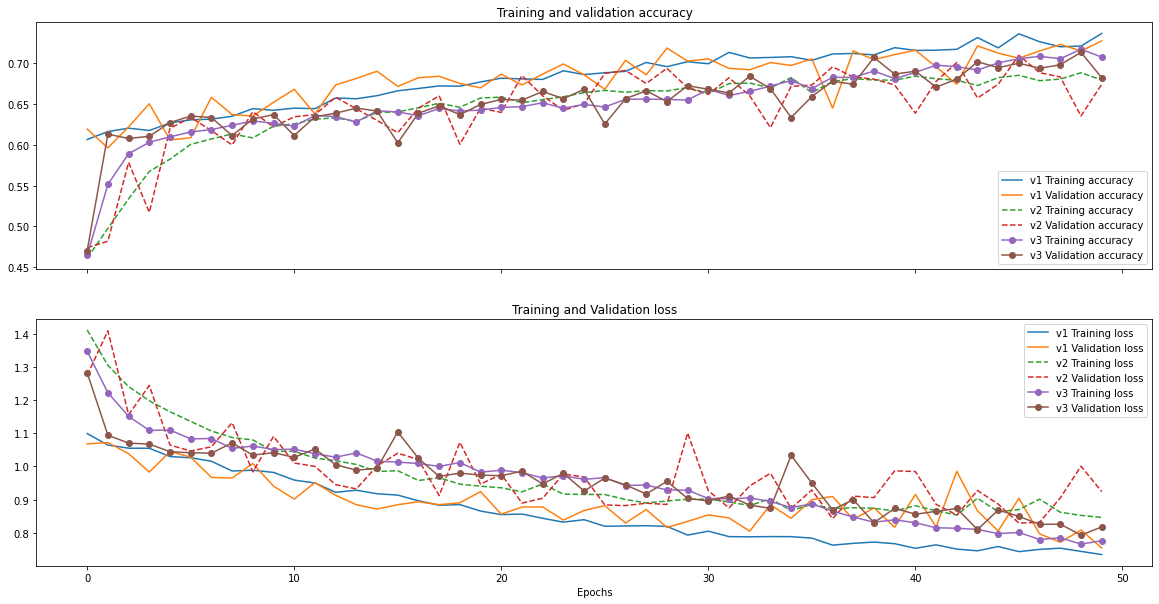

In [170]:
version = ['v1', 'v2', 'v3']
history_file_path = ['Cassava-Disease-Classification-v1.history.pickle', 
                     'Cassava-Disease-Classification-v2.history.pickle', 
                     'Cassava-Disease-Classification-v3.history.pickle']
                     
plot_training_validation_accuracy_loss(version, history_file_path)

### Upload and classify your own image

In [171]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (5).jpg
Saving train-healthy-1.jpg to train-healthy-1 (5).jpg
Saving train-healthy-2.jpg to train-healthy-2 (5).jpg
Saving train-healthy-3.jpg to train-healthy-3 (5).jpg
Saving train-healthy-4.jpg to train-healthy-4 (5).jpg
train-healthy-0.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-1.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-2.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-3.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-4.jpg
[[1. 0. 0. 0. 0.]]


## Cassava-Disease-Classification-v4 Transfer Learning MobileNetV2 34M parameters 47% training accuracy

### New: Image size is different for different pre-trained models



In [ ]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

TRAINING_DIR = "/tmp/train/"
imageDataGenerator = ImageDataGenerator(
                      rescale = 1./255,
                      rotation_range=40,
                      #width_shift_range=0.2,
                      #height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      #fill_mode='nearest', #One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'.
                      validation_split=0.2)

train_generator = imageDataGenerator.flow_from_directory(
	"/tmp/train/",
  subset='training',
	target_size=(IMG_SIZE, IMG_SIZE),
	class_mode='categorical', #"sparse" will be 1D integer labels #"categorical" will be 2D one-hot encoded labels,
  batch_size=my_batch_size,
  shuffle=True
)

validation_generator = imageDataGenerator.flow_from_directory(
	"/tmp/train/",
  subset='validation',
	target_size=(IMG_SIZE, IMG_SIZE),
	class_mode='categorical',
  batch_size=my_batch_size,
  shuffle=False
)

### Let's define our deep learning model

### New: MobileNetV2 2.2M non-trainable + 0.8M trainable parameters
https://www.tensorflow.org/tutorials/images/transfer_learning

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [172]:
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

In [175]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [176]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet', pooling='max')

### Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

### Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all the layers.

In [177]:
base_model.trainable = False

In [178]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Let's add our own custom neural network on top of MobileNetV2 and train only that small network

### Add a classification head
To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

In [179]:
model = tf.keras.Sequential([
  
  base_model,
  
  #GlobalAveragePooling2D is not needed here since base_model was defined with pooling='max' #pooling mode for feature extraction when include_top is False.
  # Global average pooling to convert the 4D tensor (batch, width, height, channel) to 2D (batch, channel)
  # tf.keras.layers.GlobalAveragePooling2D(),

  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(my_classes, activation='softmax')
])

In [180]:
for layer in model.layers:
  print(layer.name + ':  ' + str(layer.trainable))

mobilenetv2_1.00_224:  False
dense_33:  True
dropout_26:  True
dense_34:  True
dropout_27:  True
dense_35:  True
dropout_28:  True
dense_36:  True


### Model architecture with tensor shapes as they flow through our network

In [182]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               655872    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)             

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [183]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Use ModelCheckpoint callback to monitor and save the "best" model and it's weights and biases

In [184]:
checkpoint_filepath = 'Cassava-Disease-Classification-v4.h5'

my_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, 
                                        save_weights_only=True, monitor='val_loss', 
                                        mode='auto', save_best_only=True)

### Model training using GPU

In [185]:
history = model.fit(train_generator, epochs=my_epochs, validation_data = validation_generator, verbose = 1, callbacks=[my_callback])

Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 1.3870 - accuracy: 0.5083
Epoch 00001: val_loss improved from inf to 1.08422, saving model to Cassava-Disease-Classification-v4.h5
142/142 [==============================] - 66s 462ms/step - loss: 1.3870 - accuracy: 0.5083 - val_loss: 1.0842 - val_accuracy: 0.5713
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 1.0888 - accuracy: 0.5779
Epoch 00002: val_loss improved from 1.08422 to 0.99881, saving model to Cassava-Disease-Classification-v4.h5
142/142 [==============================] - 65s 459ms/step - loss: 1.0888 - accuracy: 0.5779 - val_loss: 0.9988 - val_accuracy: 0.6165
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 1.0289 - accuracy: 0.5986
Epoch 00003: val_loss improved from 0.99881 to 0.98964, saving model to Cassava-Disease-Classification-v4.h5
142/142 [==============================] - 65s 455ms/step - loss: 1.0289 - accuracy: 0.5986 - val_loss: 0.9896 - val_accu

### Store to disk the history object for plots at anytime without retraining this model

In [187]:
#Write history to disk
with open('Cassava-Disease-Classification-v4.history.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Plot training and validation accuracy and loss

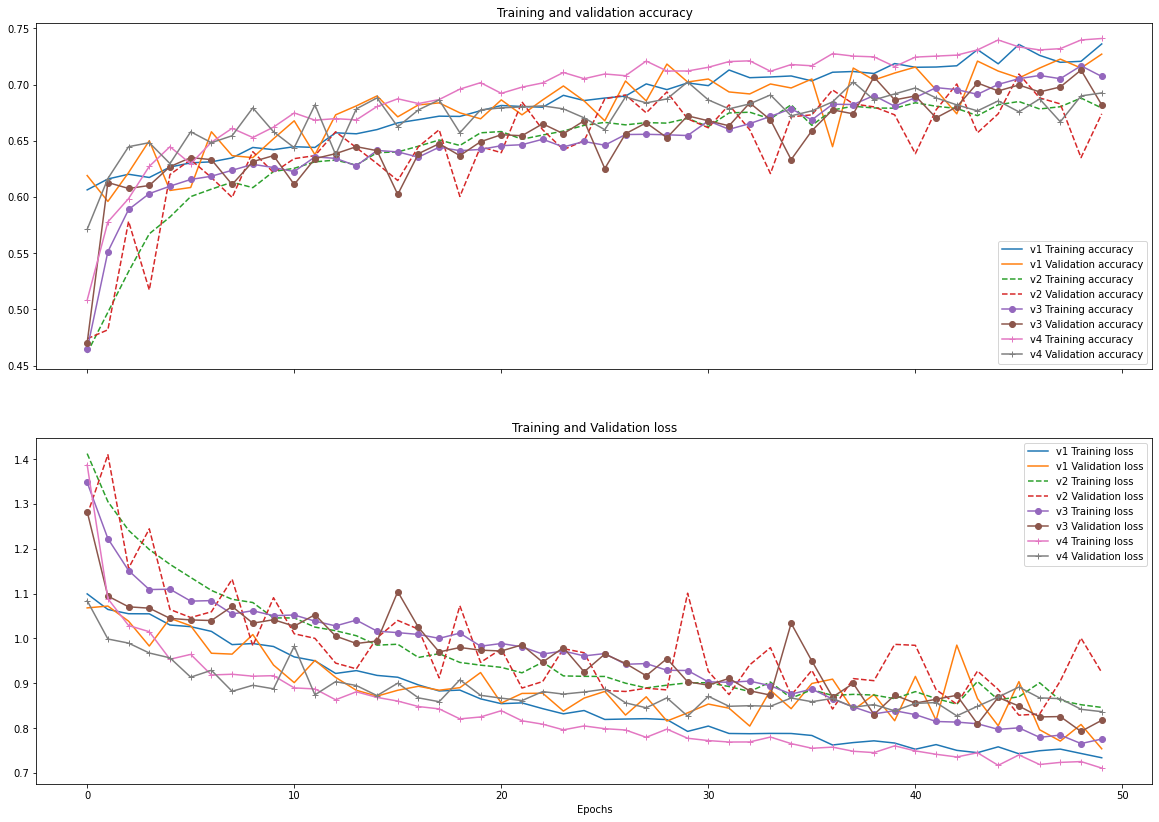

In [197]:
version = ['v1', 'v2', 'v3', 'v4']
history_file_path = ['Cassava-Disease-Classification-v1.history.pickle', 
                     'Cassava-Disease-Classification-v2.history.pickle', 
                     'Cassava-Disease-Classification-v3.history.pickle',
                     'Cassava-Disease-Classification-v4.history.pickle']
                     
plot_training_validation_accuracy_loss(version, history_file_path)

### Upload and classify your own image

In [198]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (6).jpg
Saving train-healthy-1.jpg to train-healthy-1 (6).jpg
Saving train-healthy-2.jpg to train-healthy-2 (6).jpg
Saving train-healthy-3.jpg to train-healthy-3 (6).jpg
Saving train-healthy-4.jpg to train-healthy-4 (6).jpg
train-healthy-0.jpg
[[0.13899964 0.23863687 0.15398146 0.23505855 0.23332344]]
train-healthy-1.jpg
[[0.2024918  0.35061473 0.14937693 0.12630153 0.17121495]]
train-healthy-2.jpg
[[0.1284128  0.20910367 0.18413506 0.24802147 0.23032707]]
train-healthy-3.jpg
[[0.13334589 0.11738855 0.02992214 0.01759193 0.7017515 ]]
train-healthy-4.jpg
[[0.3963498  0.24739236 0.05355327 0.01967825 0.28302637]]


### David's Code

In [219]:
IMAGE_SIZE = (224, 224)

imageDataGenerator = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=45,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        zoom_range=0.2,
                                        shear_range=10,
                                        validation_split=0.2,
                                       )

train_gen = imageDataGenerator.flow_from_directory('/tmp/train/', target_size=IMAGE_SIZE, subset='training',
                                                   class_mode='categorical', batch_size=32, shuffle=True)

val_gen = imageDataGenerator.flow_from_directory('/tmp/train/', target_size=IMAGE_SIZE, subset='validation',
                                                  class_mode='categorical', batch_size=32, shuffle=False)

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [33]:
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

MODULE_HANDLE = "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1"
#MODULE_HANDLE = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [35]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(380, 380, 3)),
    hub.KerasLayer(MODULE_HANDLE, trainable=False)
])    

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1792)              17673816  
Total params: 17,673,816
Trainable params: 0
Non-trainable params: 17,673,816
_________________________________________________________________


In [221]:
model = tf.keras.Sequential([
    InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=False),
    Dense(512, activation='relu'),
    Dropout(0.33),
    Dense(256, activation='relu'),
    Dropout(0.33),
    Dense(128, activation='relu'),
    Dropout(0.33),
    Dense(num_classes, activation='softmax')
])

In [222]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc'])

In [223]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_57 (Dense)             (None, 512)               655872    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_45 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_46 (Dropout)         (None, 128)             

In [224]:
for layer in model.layers:
  print(layer.name + ':  ' + str(layer.trainable))

keras_layer_5:  False
dense_57:  True
dropout_44:  True
dense_58:  True
dropout_45:  True
dense_59:  True
dropout_46:  True
dense_60:  True


In [225]:
checkpoint_filepath = 'model.h5'
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, 
                                        save_weights_only=True, monitor='val_loss', 
                                        mode='auto', save_best_only=True)

In [226]:
history = model.fit(train_gen, epochs=50, verbose=1, callbacks=[mc], validation_data=val_gen)

Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 1.2408 - acc: 0.5231
Epoch 00001: val_loss improved from inf to 0.94456, saving model to model.h5
142/142 [==============================] - 97s 685ms/step - loss: 1.2408 - acc: 0.5231 - val_loss: 0.9446 - val_acc: 0.6448
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 1.0017 - acc: 0.6181
Epoch 00002: val_loss improved from 0.94456 to 0.83141, saving model to model.h5
142/142 [==============================] - 97s 680ms/step - loss: 1.0017 - acc: 0.6181 - val_loss: 0.8314 - val_acc: 0.6829
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 0.9290 - acc: 0.6563
Epoch 00003: val_loss improved from 0.83141 to 0.82288, saving model to model.h5
142/142 [==============================] - 94s 665ms/step - loss: 0.9290 - acc: 0.6563 - val_loss: 0.8229 - val_acc: 0.6944
Epoch 4/50
142/142 [==============================] - ETA: 0s - loss: 0.8856 - acc: 0.6770
Epoch 00004: val_loss imp

KeyboardInterrupt: ignored

## Cassava-Disease-Classification-v5 Transfer Learning EfficientNetB7 64M parameters 47% training accuracy

### Let's define our deep learning model

### New: EfficientNetB7 64M non-trainable + 0.8M trainable parameters
https://www.tensorflow.org/tutorials/images/transfer_learning

### Note: EfficientNetB7/This API is new and only available in tf-nightly


In [27]:
!pip install tf-nightly

     |████████████████████████████████| 324.8MB 51kB/s 
     |████████████████████████████████| 460kB 2.7MB/s 
     |████████████████████████████████| 6.7MB 8.5MB/s 


### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [27]:
IMG_SIZE = 380
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

TRAINING_DIR = "/tmp/train/"
imageDataGenerator = ImageDataGenerator(
                      rescale=1/255.,
                      rotation_range=45,
                      horizontal_flip=True,
                      vertical_flip=True,
                      zoom_range=0.2,
                      shear_range=10,
                      validation_split=0.2,)

train_generator = imageDataGenerator.flow_from_directory(
	"/tmp/train/",
  subset='training',
	target_size=(IMG_SIZE, IMG_SIZE),
	class_mode='categorical', #"sparse" will be 1D integer labels #"categorical" will be 2D one-hot encoded labels,
  batch_size=my_batch_size,
  shuffle=True
)

validation_generator = imageDataGenerator.flow_from_directory(
	"/tmp/train/",
  subset='validation',
	target_size=(IMG_SIZE, IMG_SIZE),
	class_mode='categorical',
  batch_size=my_batch_size,
  shuffle=False
)

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 380
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

imageDataGenerator = ImageDataGenerator(#rescale=1/255.,
                                        rotation_range=45,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        zoom_range=0.2,
                                        shear_range=10,
                                        validation_split=0.2,
                                       )

train_generator = imageDataGenerator.flow_from_directory('/tmp/train/', target_size=(IMG_SIZE, IMG_SIZE), subset='training',
                                                   class_mode='categorical', batch_size=32, shuffle=True)

validation_generator = imageDataGenerator.flow_from_directory('/tmp/train/', target_size=(IMG_SIZE, IMG_SIZE), subset='validation',
                                                  class_mode='categorical', batch_size=32, shuffle=False)

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [38]:
# Create the base model from the pre-trained model EfficientNetB7
base_model = tf.keras.applications.EfficientNetB7(input_shape=IMG_SHAPE, include_top=False, weights='imagenet', pooling='max')

### Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

### Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. EfficientNetB7 has many layers, so setting the entire model's trainable flag to False will freeze all the layers.

In [39]:
base_model.trainable = False

In [40]:
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 380, 380, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 380, 380, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 381, 381, 3)  0           normalization_2[0][0]            
_____________________________________________________________________________________

### Let's add our own custom neural network on top of EfficientNetB7 and train only that small network

### Add a classification head
To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

In [41]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=IMG_SHAPE),

  base_model,
  
  #GlobalAveragePooling2D is not needed here since base_model was defined with pooling='max' #pooling mode for feature extraction when include_top is False.
  # Global average pooling to convert the 4D tensor (batch, width, height, channel) to 2D (batch, channel)
  #tf.keras.layers.GlobalAveragePooling2D(),

  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.33),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.33),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.33),
  tf.keras.layers.Dense(my_classes, activation='softmax')
])

In [42]:
for layer in model.layers:
  print(layer.name + ':  ' + str(layer.trainable))

efficientnetb7:  False
dense_4:  True
dropout_3:  True
dense_5:  True
dropout_4:  True
dense_6:  True
dropout_5:  True
dense_7:  True


### Model architecture with tensor shapes as they flow through our network

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 2560)              64097687  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1311232   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [44]:
#model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc'])

### Use ModelCheckpoint callback to monitor and save the "best" model and it's weights and biases

In [45]:
checkpoint_filepath = 'Cassava-Disease-Classification-v5.h5'

my_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=1, 
                                        save_weights_only=True, monitor='val_loss', 
                                        mode='auto', save_best_only=True)

### Model training using GPU

In [46]:
history = model.fit(train_generator, epochs=my_epochs, validation_data = validation_generator, verbose = 1, callbacks=[my_callback])

Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 3.4388 - acc: 0.3459
Epoch 00001: val_loss improved from inf to 1.22287, saving model to Cassava-Disease-Classification-v5.h5
142/142 [==============================] - 418s 3s/step - loss: 3.4300 - acc: 0.3463 - val_loss: 1.2229 - val_acc: 0.5199
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 1.3006 - acc: 0.5048
Epoch 00002: val_loss improved from 1.22287 to 1.14850, saving model to Cassava-Disease-Classification-v5.h5
142/142 [==============================] - 392s 3s/step - loss: 1.3005 - acc: 0.5049 - val_loss: 1.1485 - val_acc: 0.5376
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 1.2644 - acc: 0.5076
Epoch 00003: val_loss did not improve from 1.14850
142/142 [==============================] - 388s 3s/step - loss: 1.2642 - acc: 0.5077 - val_loss: 1.1655 - val_acc: 0.6174
Epoch 4/50
142/142 [==============================] - ETA: 0s - loss: 1.2409 - acc: 0.5076
Epoch

KeyboardInterrupt: ignored

### Store to disk the history object for plots at anytime without retraining this model

In [ ]:
#Write history to disk
with open('Cassava-Disease-Classification-v5.history.pickle', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Plot training and validation accuracy and loss

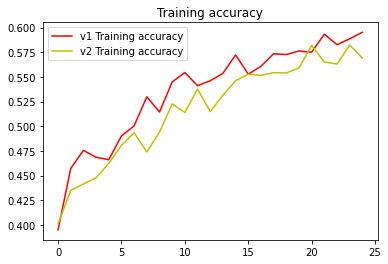

<Figure size 432x288 with 0 Axes>

In [ ]:
version = ['v1', 'v2', 'v3', 'v4', 'v5']
history_file_path = ['Cassava-Disease-Classification-v1.history.pickle', 
                     'Cassava-Disease-Classification-v2.history.pickle', 
                     'Cassava-Disease-Classification-v3.history.pickle',
                     'Cassava-Disease-Classification-v4.history.pickle',
                     'Cassava-Disease-Classification-v5.history.pickle']
                     
plot_training_validation_accuracy_loss(version, history_file_path)

### To Do:
reduce RL on pleatau  
keep only best model checkpoint  
300x300  
MobileNet or other models - Done  
pip install tf-explain  

In [ ]:
pip install tf-explain

     |████████████████████████████████| 51kB 2.5MB/s 
